env = projectai

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Walmart_reviews.csv")
data.head(2)

,Uniq Id,Crawl Timestamp,Pageurl,Website,Title,Rating,Review,Reviewer Name,Review Upvotes,Review Downvotes,Verified Purchaser,Recommended Purchase,Review Date,Five Star,Four Star,Three Star,Two Star,One Star
0,1800878dcfa5255c691f2a87ce8b2869,2020-05-16 17:58:33 +0000,https://www.walmart.com/reviews/product/36907838,walmart.com,NaN,1.0,One star for looking nice. That’s it. After tr...,PJ10,0,0,No,No,7/28/2018,23.0,5.0,1.0,3.0,6.0
1,ac06ca1b77310d539c9a74eed7a8a8e2,2020-04-17 01:05:43 +0000,https://www.walmart.com/reviews/product/708236785,walmart.com,NaN,4.0,Love this phone so far have had it almost a mo...,KelJo,9,3,No,No,11/14/2017,91.0,23.0,13.0,9.0,31.0


In [89]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['Uniq Id', 'Crawl Timestamp', 'Pageurl', 'Website', 'Title', 'Rating',
       'Review', 'Reviewer Name', 'Review Upvotes', 'Review Downvotes',
       'Verified Purchaser', 'Recommended Purchase', 'Review Date',
       'Five Star', 'Four Star', 'Three Star', 'Two Star', 'One Star'],
      dtype='object')
(29997, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29997 entries, 0 to 29996
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Uniq Id               29997 non-null  object 
 1   Crawl Timestamp       29997 non-null  object 
 2   Pageurl               29997 non-null  object 
 3   Website               29997 non-null  object 
 4   Title                 2721 non-null   object 
 5   Rating                29997 non-null  float64
 6   Review                24617 non-null  object 
 7   Reviewer Name         28377 non-null  object 
 8   Review Upvotes        29997 non-null  int64  
 9   R

In [90]:
print(data.isnull().sum())

Uniq Id                     0
Crawl Timestamp             0
Pageurl                     0
Website                     0
Title                   27276
Rating                      0
Review                   5380
Reviewer Name            1620
Review Upvotes              0
Review Downvotes            0
Verified Purchaser          0
Recommended Purchase        0
Review Date                 0
Five Star                  94
Four Star                  94
Three Star                 94
Two Star                   94
One Star                   94
dtype: int64


In [93]:
columns_to_consider = ['Rating','Review','Reviewer Name','Verified Purchaser','Review Date']
df = data[columns_to_consider]

In [94]:
df = df.copy()
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
print("After Renaming Columns:", df.columns)  

After Renaming Columns: Index(['rating', 'review', 'reviewer_name', 'verified_purchaser',
       'review_date'],
      dtype='object')


In [95]:
df.head()

,rating,review,reviewer_name,verified_purchaser,review_date
0,1.0,One star for looking nice. That’s it. After tr...,PJ10,No,7/28/2018
1,4.0,Love this phone so far have had it almost a mo...,KelJo,No,11/14/2017
2,4.0,This TV is absolutely fantastic. This is my th...,TheBigChalupa11,Yes,5/20/2020
3,5.0,"Refurb, good shape, good price, does what I wa...",Micalic,No,7/9/2019
4,5.0,Very nice tablet! Looks brand new. Fired right...,jcan74,No,2/11/2020


In [98]:
df = df.dropna()
print(df.shape)

(23702, 5)


In [99]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 23702 entries, 0 to 29996
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating              23702 non-null  float64
 1   review              23702 non-null  object 
 2   reviewer_name       23702 non-null  object 
 3   verified_purchaser  23702 non-null  object 
 4   review_date         23702 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.1+ MB
None


In [103]:
# Replace 'yes' with 1 and 'no' with 0
df['verified_purchaser'] = df['verified_purchaser'].replace({'Yes':1, 'No':0})
df.head()

,rating,review,reviewer_name,verified_purchaser,review_date
0,1.0,One star for looking nice. That’s it. After tr...,PJ10,0,7/28/2018
1,4.0,Love this phone so far have had it almost a mo...,KelJo,0,11/14/2017
2,4.0,This TV is absolutely fantastic. This is my th...,TheBigChalupa11,1,5/20/2020
3,5.0,"Refurb, good shape, good price, does what I wa...",Micalic,0,7/9/2019
4,5.0,Very nice tablet! Looks brand new. Fired right...,jcan74,0,2/11/2020


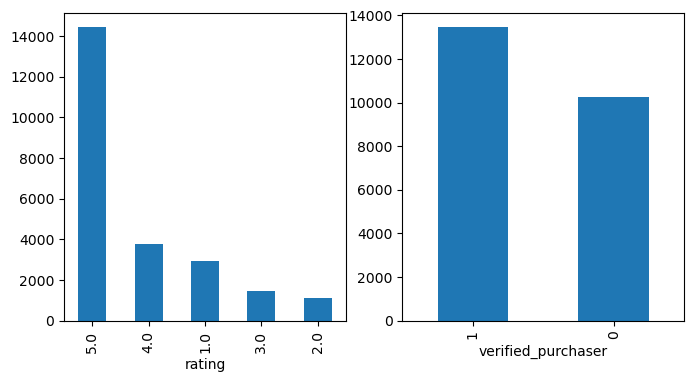

In [107]:
value_counts_rating = df['rating'].value_counts()
value_counts_verified = df['verified_purchaser'].value_counts()

fig, axes = plt.subplots(1,2,figsize=(8,4))
value_counts_rating.plot(kind='bar',ax=axes[0])
value_counts_verified.plot(kind='bar',ax=axes[1])
plt.show()

In [108]:
df.head()

,rating,review,reviewer_name,verified_purchaser,review_date
0,1.0,One star for looking nice. That’s it. After tr...,PJ10,0,7/28/2018
1,4.0,Love this phone so far have had it almost a mo...,KelJo,0,11/14/2017
2,4.0,This TV is absolutely fantastic. This is my th...,TheBigChalupa11,1,5/20/2020
3,5.0,"Refurb, good shape, good price, does what I wa...",Micalic,0,7/9/2019
4,5.0,Very nice tablet! Looks brand new. Fired right...,jcan74,0,2/11/2020


In [109]:
df.to_csv("cleaneddata.csv", index=False)